In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('Top2000CompaniesFinancialData2024.csv')

In [4]:
df.head()

,Unnamed: 0,Name,Country,Sales,Profit,Assets,Market Value
0,0,JPMorganChase,United States,$252.9 B,$50 B,"$4,090.7 B",$588.1 B
1,1,Berkshire Hathaway,United States,$369 B,$73.4 B,"$1,070 B",$899.1 B
2,2,Saudi Arabian Oil Company (Saudi Aramco),Saudi Arabia,$489.1 B,$116.9 B,$661.5 B,"$1,919.3 B"
3,3,ICBC,China,$223.8 B,$50.4 B,"$6,586 B",$215.2 B
4,4,Bank of America,United States,$183.3 B,$25 B,"$3,273.8 B",$307.3 B


In [5]:
df.drop(columns=['Unnamed: 0'], inplace=True)
financial_columns = ['Sales', 'Profit', 'Assets', 'Market Value']
for column in financial_columns:
    df[column] = df[column].replace({'\$': '', ',': '', ' B': 'e9', ' M':'e6'}, regex=True).astype(float)

In [6]:
df.isnull().sum()

Name            0
Country         0
Sales           0
Profit          0
Assets          0
Market Value    0
dtype: int64

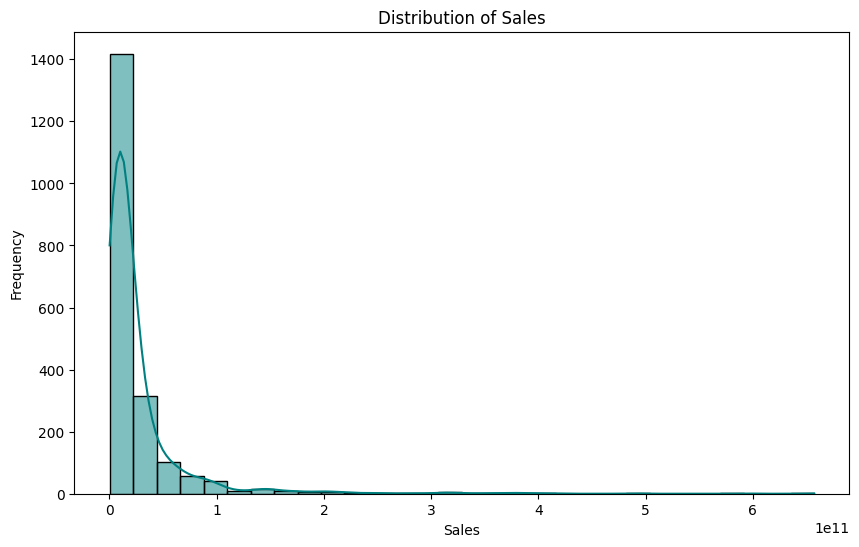

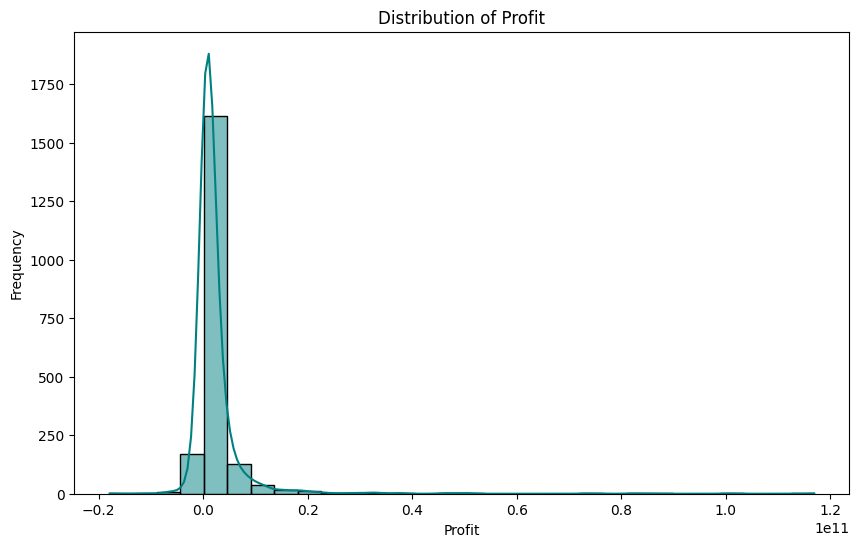

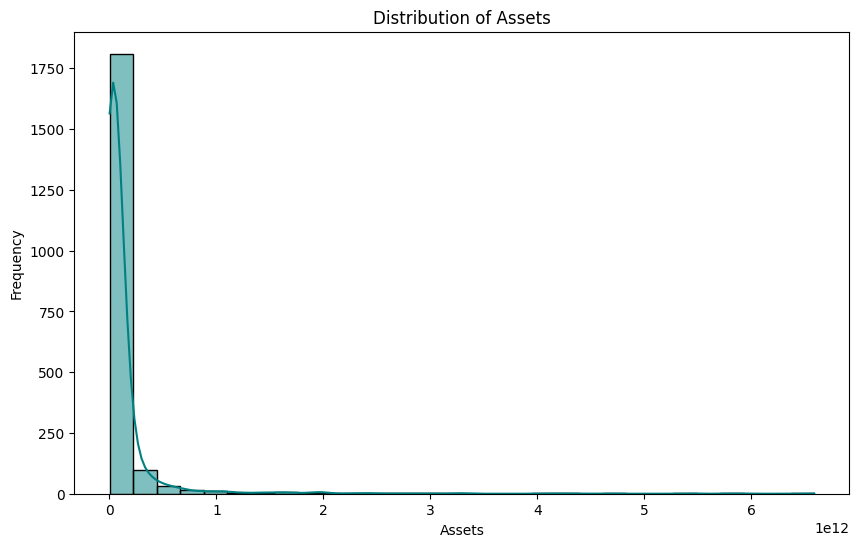

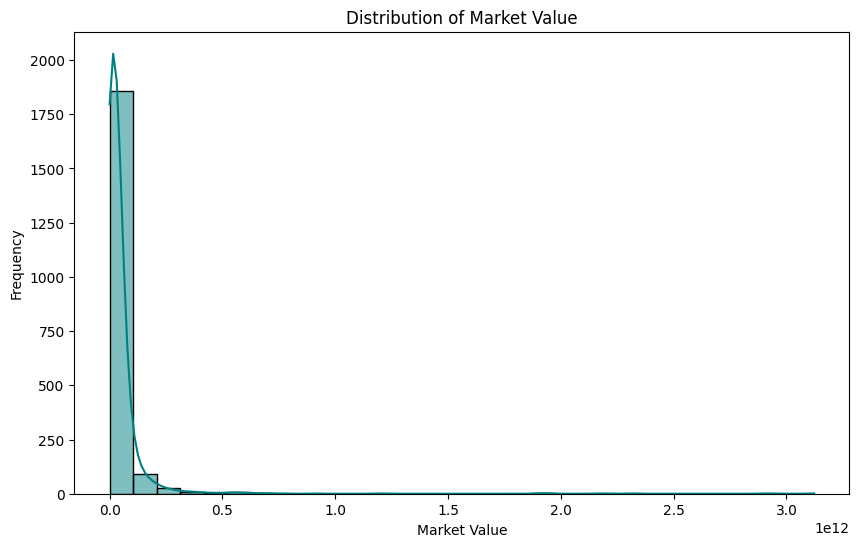

In [7]:
for column in financial_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], kde=True, bins=30, color='teal')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

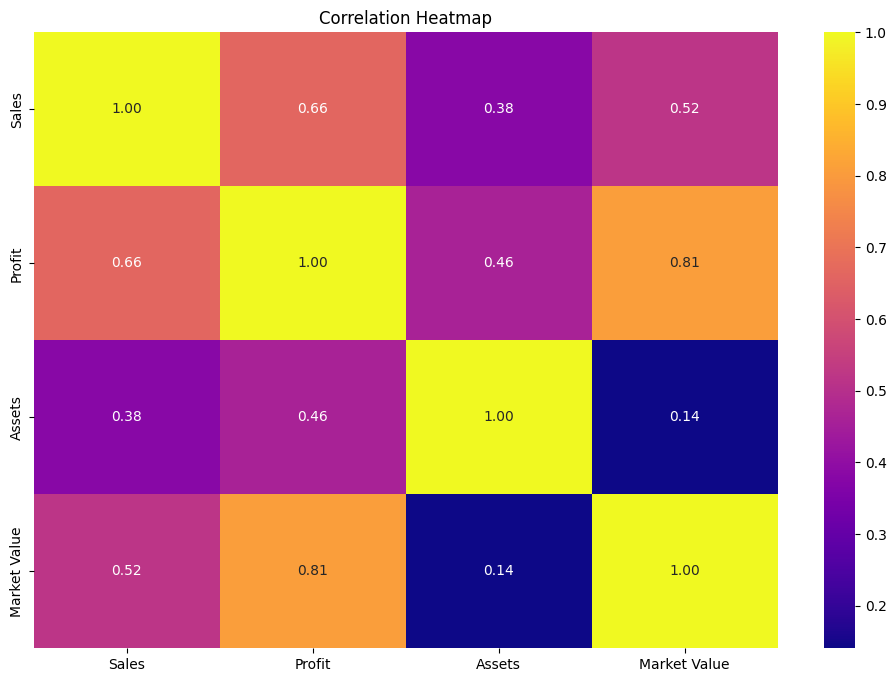

In [8]:
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='plasma', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()